In [253]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Q1 Read the input file and check the data dimension

In [254]:
#Read input file and understand the data
# "default" is my dependent variable
german_credit=pd.read_csv("german_credit.csv")
german_credit

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
5,0,no checking account,36,existing credits paid back duly till now,(vacation - does not exist?),9055,unknown/ no savings account,1 <= ... < 4 years,2,male : single,...,4,unknown / no property,35,none,for free,1,unskilled - resident,2,"yes, registered under the customers name",yes
6,0,no checking account,24,existing credits paid back duly till now,radio/television,2835,500 <= ... < 1000 DM,.. >= 7 years,3,male : single,...,4,if not A121 : building society savings agreeme...,53,none,own,1,skilled employee / official,1,none,yes
7,0,0 <= ... < 200 DM,36,existing credits paid back duly till now,car (used),6948,... < 100 DM,1 <= ... < 4 years,2,male : single,...,2,"if not A121/A122 : car or other, not in attrib...",35,none,rent,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
8,0,no checking account,12,existing credits paid back duly till now,domestic appliances,3059,.. >= 1000 DM,4 <= ... < 7 years,2,male : divorced/separated,...,4,real estate,61,none,own,1,unskilled - resident,1,none,yes
9,1,0 <= ... < 200 DM,30,critical account/ other credits existing (not ...,car (new),5234,... < 100 DM,unemployed,4,male : married/widowed,...,2,"if not A121/A122 : car or other, not in attrib...",28,none,own,2,management/ self-employed/ highly qualified em...,1,none,yes


In [255]:
german_credit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [256]:
german_credit['default'].value_counts()

0    700
1    300
Name: default, dtype: int64

In [257]:
german_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [258]:
# Print Shape of model data
german_credit.shape


(1000, 21)

In [259]:
#dummy=pd.get_dummies(german_credit)

In [260]:
#dummy.head()

In [261]:
##german_credit = pd.concat([german_credit,dummy],axis=1)
#german_credit.head()

In [262]:
#german_credit=german_credit.merge(dummy,left_index=True,right_index=True)
#german_credit.head()

In [263]:
for feature in german_credit.columns: # Loop through all columns in the dataframe
    if german_credit[feature].dtype == 'object': # Only apply for columns with categorical strings
        german_credit[feature] = pd.Categorical(german_credit[feature]).codes # Replace strings with an integer

In [264]:
german_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null int8
duration_in_month             1000 non-null int64
credit_history                1000 non-null int8
purpose                       1000 non-null int8
credit_amount                 1000 non-null int64
savings                       1000 non-null int8
present_emp_since             1000 non-null int8
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null int8
other_debtors                 1000 non-null int8
present_res_since             1000 non-null int64
property                      1000 non-null int8
age                           1000 non-null int64
other_installment_plans       1000 non-null int8
housing                       1000 non-null int8
credits_this_bank             1000 non-null int64
job                           1000 non-null int8
peopl

In [265]:
#import seaborn as sns
#sns.pairplot(german_credit)

### Check for highly correlated variables but don't required any treatment for this use case

### Drop the original variables which are converted to dummy

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [266]:
 #splitting data into training and test set for independent attributes


train_set = german_credit.head(700) # Up to the last initial training set row
test_set = german_credit.tail(300) # Past the last initial training set row

# capture the target column ("default") into separate vectors for training set and test set
train_labels = train_set.pop("default")
test_labels = test_set.pop("default")


In [267]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [268]:
dt_model.fit(train_set, train_labels )

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [269]:
dt_model.score(test_set , test_labels)

0.6666666666666666

In [270]:
dt_model.score(train_set, train_labels)

1.0

In [271]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5 )
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [272]:
print(dt_model.score(train_set , train_labels))

print(dt_model.score(test_set , test_labels))

0.7671428571428571
0.7533333333333333


In [273]:
german_credit_labels = german_credit.pop("default") 

In [274]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=50, max_samples=.7 , oob_score=True)

bgcl = bgcl.fit(german_credit,german_credit_labels)
print(bgcl.oob_score_)

0.757


In [275]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
#abcl = AdaBoostClassifier(n_estimators=50)
abcl = abcl.fit(train_set, train_labels)


In [276]:
test_pred = abcl.predict(test_set)
abcl.score(test_set , test_labels)

0.7266666666666667

In [277]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)
gbcl = gbcl.fit(train_set, train_labels)

In [278]:
test_pred = gbcl.predict(test_set)
gbcl.score(test_set , test_labels)

0.7533333333333333

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [279]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 500,n_jobs=2,criterion='entropy',random_state=9999)
rfcl = rfcl.fit(train_set, train_labels)

In [280]:
test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)

0.76

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [281]:
train_labels = dt_model.predict(test_set)

In [282]:
from sklearn import metrics
print(metrics.confusion_matrix(test_labels, train_labels))

[[181  26]
 [ 48  45]]


In [283]:
dt_model.score(test_set , test_labels)

0.7533333333333333

### Q6 Show the list of the features importance( 1 Marks)

In [284]:
features=german_credit.columns

Text(0.5, 0, 'Relative Importance')

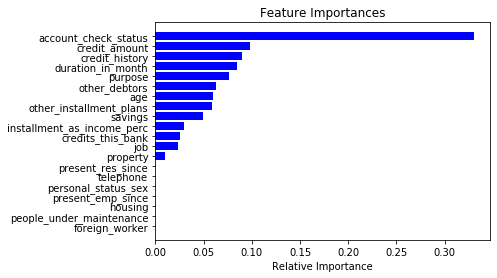

In [285]:
importances = dt_model.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [286]:
test_set.shape,test_labels.shape

((300, 20), (300,))

In [287]:
train_set.shape,train_labels.shape

((700, 20), (300,))

In [288]:
from sklearn import datasets
from sklearn import svm

In [289]:
clf = svm.SVC(kernel='linear', C=1).fit(test_set,test_labels)
clf.score(train_set,train_labels)

ValueError: Found input variables with inconsistent numbers of samples: [300, 700]

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [4]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [2]:
# Use below values
num_folds = 10
seed = 77

In [ ]:
#Validate the Random Forest model build above using k fold

In [3]:
kfcv=KFold(n_splits=10,random_state=77)
for k,(train_set,test_set) in enumerate(kfcv.split(x,y)):
    train_set,test_set=x.iloc[train_set],x.iloc[test_set]
    train_labels,test_labels=y.iloc[train_set],y.iloc[test_set]]
    rfmodel.fit(x.iloc[train_set]),y.iloc[train_set])
    ypredict=rfmodel.predict(test_set)

SyntaxError: invalid syntax (<ipython-input-3-641dd1ed5aba>, line 4)

In [ ]:
#Calculate Mean score

In [5]:
scores=cross_val_score(frmodel,x,y,cv=10)
print(scores)
print("mean score",scores.mean())

NameError: name 'frmodel' is not defined

In [ ]:
# Calculate score standard deviation using std()

# Q8 Print the confusion matrix( 1 Marks)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [ ]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(test_set, test_labels)
    rfm.fit(X_, y_)
    train_labels = rfm.predict(test_set)
    
    acc = accuracy_score(train_labels, test_labels)
    accuracy.append(acc)

In [ ]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())